# Python for Finance - part 3

#### 금융분석과 관련된 기본적인 내용을 정리하였습니다. 파이썬을 활용한 금융분석 (이브 힐피시 지음)을 참고하였습니다.

## Chapter 6. 금융 시계열
### 6.1 pandas 기초
#### 6.1.1 Dataframe 클래스 다루기 1단계

In [5]:
import numpy as np
import pandas as pd

In [6]:
df = pd.DataFrame([10, 20, 30, 40], columns=['numbers'], index = ['a', 'b', 'c', 'd'])
df

,numbers
a,10
b,20
c,30
d,40


In [11]:
print(df.index)
print('************************************')
print(df.columns)
print('************************************')
print(df.loc['c'])
print('************************************')
print(df.loc[['a','d']])
print('************************************')
print(df.loc[df.index[1:3]])
print('************************************')
print(df.sum())
print('************************************')
print(df.apply(lambda x: x**2))

Index(['a', 'b', 'c', 'd'], dtype='object')
************************************
Index(['numbers'], dtype='object')
************************************
numbers    30
Name: c, dtype: int64
************************************
   numbers
a       10
d       40
************************************
   numbers
b       20
c       30
************************************
numbers    100
dtype: int64
************************************
   numbers
a      100
b      400
c      900
d     1600


In [13]:
df['float'] = (1.5, 2.5, 3.5, 4.5)
df

,numbers,float
a,10,1.5
b,20,2.5
c,30,3.5
d,40,4.5


In [15]:
df['names'] = pd.DataFrame(['Yves', 'Guido', 'Felix', 'Francesc'], index =['d','a','b','c'])
df

,numbers,float,names
a,10,1.5,Guido
b,20,2.5,Felix
c,30,3.5,Francesc
d,40,4.5,Yves


In [18]:
df.append({'numbers' : 100, 'float' : 3.5, 'names' : 'Henry'}, ignore_index = True)


,numbers,float,names
0,10,1.5,Guido
1,20,2.5,Felix
2,30,3.5,Francesc
3,40,4.5,Yves
4,100,3.5,Henry


In [20]:
df = df.append(pd.DataFrame({'numbers' : 100, 'float' : 3.5, 'names' : 'Henry'}, index =['z',]))
df

,numbers,float,names
a,10,1.5,Guido
b,20,2.5,Felix
c,30,3.5,Francesc
d,40,4.5,Yves
z,100,3.5,Henry
z,100,3.5,Henry


In [25]:
df.join(pd.DataFrame([1,2,4,9,16,25], index = ['a','b','c','d','y', 'y'], columns = ['squares']))

ValueError: columns overlap but no suffix specified: Index(['squares'], dtype='object')

In [23]:
df = df.join(pd.DataFrame([1,2,4,9,16,25.25], index = ['a','b','c','d','y', 'y'], columns = ['squares']) ,how='outer')
df

,numbers,float,names,squares
a,10.0,1.5,Guido,1.00
b,20.0,2.5,Felix,2.00
c,30.0,3.5,Francesc,4.00
d,40.0,4.5,Yves,9.00
y,NaN,NaN,NaN,16.00
y,NaN,NaN,NaN,25.25
z,100.0,3.5,Henry,NaN
z,100.0,3.5,Henry,NaN


#### 6.1.2 DataFrame 클래스 다루기 2단계

In [26]:
a = np.random.standard_normal((9,4))
a.round(6)

array([[ 0.785896,  0.433704,  1.16459 , -0.521183],
       [-1.465945,  0.689775,  0.003484,  0.719004],
       [-1.496249,  0.944045,  1.309003, -0.38701 ],
       [ 1.022821,  0.207187, -0.242165,  2.352492],
       [-0.629778,  0.712531, -1.495751, -0.133665],
       [-1.24355 ,  0.280041,  1.247394, -2.01185 ],
       [-0.468613,  0.236719,  0.411597,  0.26169 ],
       [ 0.576512, -0.616563, -1.27145 , -0.77481 ],
       [ 1.95212 ,  2.011108, -0.864129, -0.437259]])

In [27]:
df = pd.DataFrame(a)
df

,0,1,2,3
0,0.785896,0.433704,1.164590,-0.521183
1,-1.465945,0.689775,0.003484,0.719004
2,-1.496249,0.944045,1.309003,-0.387010
3,1.022821,0.207187,-0.242165,2.352492
4,-0.629778,0.712531,-1.495751,-0.133665
5,-1.243550,0.280041,1.247394,-2.011850
6,-0.468613,0.236719,0.411597,0.261690
7,0.576512,-0.616563,-1.271450,-0.774810
8,1.952120,2.011108,-0.864129,-0.437259


In [64]:
df.columns = ['No1', 'No2', 'No3', 'No4']
df

,No1,No2,No3,No4
2015-01-31,0.785896,0.433704,1.164590,-0.521183
2015-02-28,-1.465945,0.689775,0.003484,0.719004
2015-03-31,-1.496249,0.944045,1.309003,-0.387010
2015-04-30,1.022821,0.207187,-0.242165,2.352492
2015-05-31,-0.629778,0.712531,-1.495751,-0.133665
2015-06-30,-1.243550,0.280041,1.247394,-2.011850
2015-07-31,-0.468613,0.236719,0.411597,0.261690
2015-08-31,0.576512,-0.616563,-1.271450,-0.774810
2015-09-30,1.952120,2.011108,-0.864129,-0.437259


In [42]:
df.loc[3, 'No2']

No2    0.207187
Name: 3, dtype: float64

In [43]:
dates = pd.date_range('2015-1-1', periods=9, freq='M')
dates

DatetimeIndex(['2015-01-31', '2015-02-28', '2015-03-31', '2015-04-30',
               '2015-05-31', '2015-06-30', '2015-07-31', '2015-08-31',
               '2015-09-30'],
              dtype='datetime64[ns]', freq='M')

In [45]:
df.index = dates
df

,No1,No2,No3,No4
2015-01-31,0.785896,0.433704,1.164590,-0.521183
2015-02-28,-1.465945,0.689775,0.003484,0.719004
2015-03-31,-1.496249,0.944045,1.309003,-0.387010
2015-04-30,1.022821,0.207187,-0.242165,2.352492
2015-05-31,-0.629778,0.712531,-1.495751,-0.133665
2015-06-30,-1.243550,0.280041,1.247394,-2.011850
2015-07-31,-0.468613,0.236719,0.411597,0.261690
2015-08-31,0.576512,-0.616563,-1.271450,-0.774810
2015-09-30,1.952120,2.011108,-0.864129,-0.437259


In [46]:
np.array(df).round(6)

array([[ 0.785896,  0.433704,  1.16459 , -0.521183],
       [-1.465945,  0.689775,  0.003484,  0.719004],
       [-1.496249,  0.944045,  1.309003, -0.38701 ],
       [ 1.022821,  0.207187, -0.242165,  2.352492],
       [-0.629778,  0.712531, -1.495751, -0.133665],
       [-1.24355 ,  0.280041,  1.247394, -2.01185 ],
       [-0.468613,  0.236719,  0.411597,  0.26169 ],
       [ 0.576512, -0.616563, -1.27145 , -0.77481 ],
       [ 1.95212 ,  2.011108, -0.864129, -0.437259]])

#### 6.1.3 기초적인 분석

In [47]:
df.sum()

No1   -0.966784
No2    4.898546
No3    0.262573
No4   -0.932591
dtype: float64

In [48]:
df.mean()

No1   -0.107420
No2    0.544283
No3    0.029175
No4   -0.103621
dtype: float64

In [49]:
df.cumsum()

,No1,No2,No3,No4
2015-01-31,0.785896,0.433704,1.164590,-0.521183
2015-02-28,-0.680049,1.123479,1.168075,0.197821
2015-03-31,-2.176297,2.067524,2.477078,-0.189189
2015-04-30,-1.153476,2.274711,2.234913,2.163303
2015-05-31,-1.783255,2.987242,0.739162,2.029638
2015-06-30,-3.026804,3.267283,1.986556,0.017789
2015-07-31,-3.495417,3.504002,2.398152,0.279479
2015-08-31,-2.918905,2.887439,1.126702,-0.495332
2015-09-30,-0.966784,4.898546,0.262573,-0.932591


In [50]:
df.describe()

,No1,No2,No3,No4
count,9.000000,9.000000,9.000000,9.000000
mean,-0.107420,0.544283,0.029175,-0.103621
std,1.237612,0.706992,1.086665,1.188559
min,-1.496249,-0.616563,-1.495751,-2.011850
25%,-1.243550,0.236719,-0.864129,-0.521183
50%,-0.468613,0.433704,0.003484,-0.387010
75%,0.785896,0.712531,1.164590,0.261690
max,1.952120,2.011108,1.309003,2.352492


In [51]:
np.sqrt(df)

c:\py_workplace\jupyter\venv\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.


,No1,No2,No3,No4
2015-01-31,0.886508,0.658562,1.079162,NaN
2015-02-28,NaN,0.830527,0.059029,0.847941
2015-03-31,NaN,0.971620,1.144117,NaN
2015-04-30,1.011346,0.455178,NaN,1.533784
2015-05-31,NaN,0.844115,NaN,NaN
2015-06-30,NaN,0.529189,1.116868,NaN
2015-07-31,NaN,0.486538,0.641558,0.511557
2015-08-31,0.759284,NaN,NaN,NaN
2015-09-30,1.397183,1.418135,NaN,NaN


In [52]:
np.sqrt(df).sum()

c:\py_workplace\jupyter\venv\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.


No1    4.054321
No2    6.193864
No3    4.040733
No4    2.893281
dtype: float64

Matplotlib is building the font cache; this may take a moment.


<AxesSubplot:>

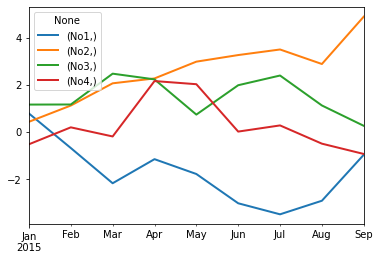

In [56]:
df.cumsum().plot(lw=2.)

#### 6.1.4 Series 클래스

In [57]:
type(df)

pandas.core.frame.DataFrame

In [65]:
df['No1']

2015-01-31    0.785896
2015-02-28   -1.465945
2015-03-31   -1.496249
2015-04-30    1.022821
2015-05-31   -0.629778
2015-06-30   -1.243550
2015-07-31   -0.468613
2015-08-31    0.576512
2015-09-30    1.952120
Freq: M, Name: No1, dtype: float64

In [66]:
type(df['No1'])

pandas.core.series.Series

Text(0, 0.5, 'value')

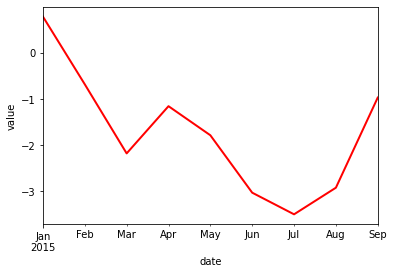

In [68]:
import matplotlib.pyplot as plt
df['No1'].cumsum().plot(style='r', lw=2.)
plt.xlabel('date')
plt.ylabel('value')

#### 6.1.5 Groupby 연산

In [69]:
df['Quarter'] = ['Q1', 'Q1','Q1','Q2','Q2','Q2','Q3','Q3','Q3']
df

,No1,No2,No3,No4,Quarter
2015-01-31,0.785896,0.433704,1.164590,-0.521183,Q1
2015-02-28,-1.465945,0.689775,0.003484,0.719004,Q1
2015-03-31,-1.496249,0.944045,1.309003,-0.387010,Q1
2015-04-30,1.022821,0.207187,-0.242165,2.352492,Q2
2015-05-31,-0.629778,0.712531,-1.495751,-0.133665,Q2
2015-06-30,-1.243550,0.280041,1.247394,-2.011850,Q2
2015-07-31,-0.468613,0.236719,0.411597,0.261690,Q3
2015-08-31,0.576512,-0.616563,-1.271450,-0.774810,Q3
2015-09-30,1.952120,2.011108,-0.864129,-0.437259,Q3


In [70]:
groups = df.groupby('Quarter')

In [71]:
groups.mean()

,No1,No2,No3,No4
Quarter,,,,
Q1,-0.725432,0.689175,0.825693,-0.063063
Q2,-0.283502,0.399920,-0.163507,0.068993
Q3,0.686673,0.543755,-0.574661,-0.316793


In [73]:
groups.max()

,No1,No2,No3,No4
Quarter,,,,
Q1,0.785896,0.944045,1.309003,0.719004
Q2,1.022821,0.712531,1.247394,2.352492
Q3,1.952120,2.011108,0.411597,0.261690


In [74]:
groups.size()

Quarter
Q1    3
Q2    3
Q3    3
dtype: int64

In [75]:
df['Odd_Even'] = ['Odd', 'Even', 'Odd', 'Even', 'Odd', 'Even', 'Odd', 'Even', 'Odd']

In [76]:
groups = df.groupby(['Quarter', 'Odd_Even'])
groups.size()

Quarter  Odd_Even
Q1       Even        1
         Odd         2
Q2       Even        2
         Odd         1
Q3       Even        1
         Odd         2
dtype: int64

In [77]:
groups.mean()

No1       No2       No3       No4
Quarter Odd_Even                                        
Q1      Even     -1.465945  0.689775  0.003484  0.719004
        Odd      -0.355176  0.688874  1.236797 -0.454097
Q2      Even     -0.110364  0.243614  0.502615  0.170321
        Odd      -0.629778  0.712531 -1.495751 -0.133665
Q3      Even      0.576512 -0.616563 -1.271450 -0.774810
        Odd       0.741754  1.123913 -0.226266 -0.087785

### 6.2 금융자료

In [82]:
from pandas_datareader import data as web
import yfinance as yf
yf.pdr_override()

In [84]:
DAX = web.get_data_yahoo(tickers= '^GDAXI', start='2000-1-1')

[*********************100%***********************]  1 of 1 completed


In [85]:
DAX.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5856 entries, 2000-01-03 to 2023-01-24
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       5856 non-null   float64
 1   High       5856 non-null   float64
 2   Low        5856 non-null   float64
 3   Close      5856 non-null   float64
 4   Adj Close  5856 non-null   float64
 5   Volume     5856 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 320.2 KB


In [86]:
DAX.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-18,15182.950195,15250.360352,15156.889648,15181.799805,15181.799805,58258000
2023-01-19,15115.549805,15134.070312,14906.269531,14920.360352,14920.360352,64167400
2023-01-20,14986.519531,15034.429688,14940.679688,15033.559570,15033.559570,64031100
2023-01-23,15077.400391,15145.900391,15022.830078,15102.950195,15102.950195,39903900
2023-01-24,15140.500000,15147.450195,15093.419922,15094.169922,15094.169922,0


<AxesSubplot:xlabel='Date'>

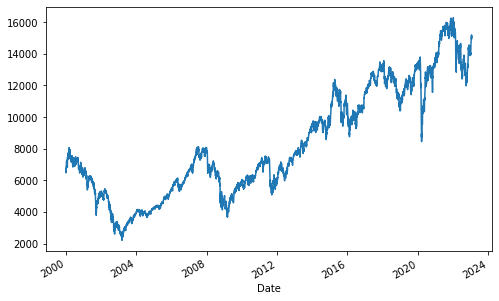

In [87]:
DAX['Close'].plot(figsize=(8,5))

In [88]:
DAX['Ret_Loop'] = 0.0
for i in range(1, len(DAX)):
    DAX['Ret_Loop'][i] = np.log(DAX['Close'][i] / DAX['Close'][i-1])

DAX[['Close', 'Ret_Loop']].tail()

c:\py_workplace\jupyter\venv\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Close,Ret_Loop
Date,,
2023-01-18,15181.799805,-0.000347
2023-01-19,14920.360352,-0.017371
2023-01-20,15033.559570,0.007558
2023-01-23,15102.950195,0.004605
2023-01-24,15094.169922,-0.000582


In [90]:
DAX['Return'] = np.log(DAX['Close'] / DAX['Close'].shift(1))
DAX[['Close', 'Ret_Loop', 'Return']].tail()

,Close,Ret_Loop,Return
Date,,,
2023-01-18,15181.799805,-0.000347,-0.000347
2023-01-19,14920.360352,-0.017371,-0.017371
2023-01-20,15033.559570,0.007558,0.007558
2023-01-23,15102.950195,0.004605,0.004605
2023-01-24,15094.169922,-0.000582,-0.000582


In [91]:
del DAX['Ret_Loop']

#### 변동성 군집현상 : 변동성은 시간에 따라 일정하게 유지되지 않는다. 변동성이 높게 유지되는 구간(수익률의 부호와 상관없이 크기가 커지는시기)과 변동성이 낮게 유지되는 구간이 존재
#### 레버리지 효과 : 일반적으로 변동성과 주식 시장 수익률은 음의 상관관계, 시장이 하락하면 변동성이 증가하고 시장이 상승하면 반대로 변동성이 하락

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

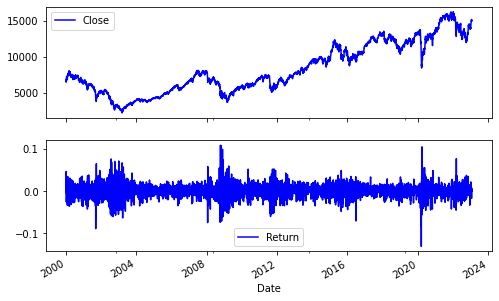

In [92]:
DAX[['Close', 'Return']].plot(subplots=True, style='b', figsize=(8,5))

In [ ]:
DAX.rolling(

In [97]:
DAX['42d'] =DAX['Close'].rolling(window=42).mean()
DAX['252d'] = DAX['Close'].rolling(window=252).mean()
DAX[['Close', '42d', '252d']].tail()

,Close,42d,252d
Date,,,
2023-01-18,15181.799805,14403.454939,13782.069526
2023-01-19,14920.360352,14416.322335,13779.673061
2023-01-20,15033.559570,14430.874953,13778.540558
2023-01-23,15102.950195,14446.954962,13777.079249
2023-01-24,15094.169922,14460.159970,13774.995044


<AxesSubplot:xlabel='Date'>

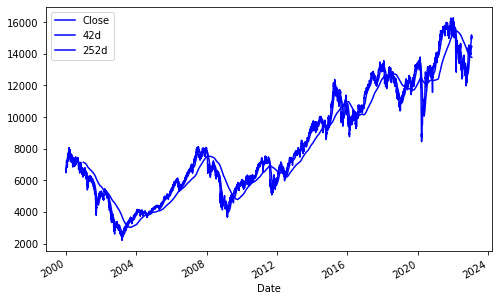

In [99]:
DAX[['Close', '42d', '252d']].plot(style='b', figsize=(8,5))

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>], dtype=object)

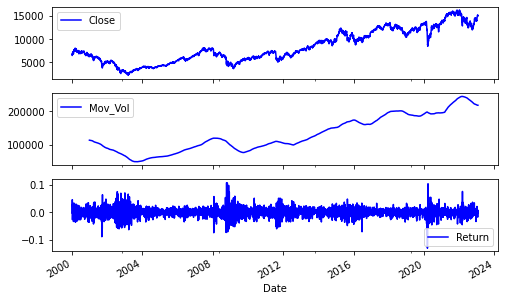

In [101]:
import math
DAX['Mov_Vol'] = DAX['Close'].rolling(window=252).mean() * math.sqrt(252)
DAX[['Close', 'Mov_Vol', 'Return']].plot(subplots = True, style='b', figsize=(8,5))

### 6.3 회귀분석

In [103]:
import pandas as pd
from urllib.request import urlretrieve

In [119]:
es_url = 'http://www.stoxx.com/download/historical_values/hbrbcpe.txt'
vs_url = 'http://www.stoxx.com/download/historical_values/h_vstoxx.txt'
urlretrieve(es_url, './data/es.txt')
urlretrieve(vs_url, './data/vs.txt')

('./data/vs.txt', <http.client.HTTPMessage at 0x14166090>)

In [105]:
lines = open('./data/es.txt', 'r').readlines()
lines = [line.replace(' ','') for line in lines]
lines[:6]

['PriceIndices-EUROCurrency\n',
 'Date;Blue-Chip;Blue-Chip;Broad;Broad;ExUK;ExEuroZone;Blue-Chip;Broad\n',
 ';Europe;Euro-Zone;Europe;Euro-Zone;;;Nordic;Nordic\n',
 ';SX5P;SX5E;SXXP;SXXE;SXXF;SXXA;DK5F;DKXF\n',
 '31.12.1986;775.00;900.82;82.76;98.58;98.06;69.06;645.26;65.56\n',
 '01.01.1987;775.00;900.82;82.76;98.58;98.06;69.06;645.26;65.56\n']

In [106]:
for line in lines[3883:3890]:
    print(line[41:])

317.10;267.23;5268.36;363.19

322.55;272.18;5360.52;370.94

322.69;272.95;5360.52;370.94

327.57;277.68;5479.59;378.69;

329.94;278.87;5585.35;386.99;

326.77;272.38;5522.25;380.09;

332.62;277.08;5722.57;396.12;



In [107]:
new_file = open('./data/es50.txt', 'w')
new_file.writelines('date' + lines[3][:-1] + ';DEL' + lines[3][-1])
new_file.writelines(lines[4:])
new_file.close()

In [108]:
new_lines = open('./data/es50.txt', 'r').readlines()
new_lines[:5]

['date;SX5P;SX5E;SXXP;SXXE;SXXF;SXXA;DK5F;DKXF;DEL\n',
 '31.12.1986;775.00;900.82;82.76;98.58;98.06;69.06;645.26;65.56\n',
 '01.01.1987;775.00;900.82;82.76;98.58;98.06;69.06;645.26;65.56\n',
 '02.01.1987;770.89;891.78;82.57;97.80;97.43;69.37;647.62;65.81\n',
 '05.01.1987;771.89;898.33;82.82;98.60;98.19;69.16;649.94;65.82\n']

In [110]:
es = pd.read_csv('./data/es50.txt', index_col=0, parse_dates=True, sep=';', dayfirst=True)
np.round(es.tail())

,SX5P,SX5E,SXXP,SXXE,SXXF,SXXA,DK5F,DKXF,DEL
date,,,,,,,,,
2016-09-28,2847.0,2991.0,343.0,324.0,408.0,350.0,9072.0,581.0,NaN
2016-09-29,2849.0,2992.0,343.0,324.0,408.0,351.0,9112.0,583.0,NaN
2016-09-30,2843.0,3002.0,343.0,325.0,408.0,350.0,9116.0,583.0,NaN
2016-10-03,2845.0,2998.0,343.0,325.0,408.0,351.0,9131.0,584.0,NaN
2016-10-04,2871.0,3030.0,346.0,328.0,411.0,354.0,9212.0,589.0,NaN


In [111]:
del es['DEL']
es.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7673 entries, 1986-12-31 to 2016-10-04
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SX5P    7673 non-null   float64
 1   SX5E    7673 non-null   float64
 2   SXXP    7673 non-null   float64
 3   SXXE    7673 non-null   float64
 4   SXXF    7673 non-null   float64
 5   SXXA    7673 non-null   float64
 6   DK5F    7673 non-null   float64
 7   DKXF    7673 non-null   float64
dtypes: float64(8)
memory usage: 539.5 KB


In [117]:
es = pd.read_csv(es_url, index_col=0, parse_dates=True, sep=';', dayfirst=True, header=None, skiprows=4, names=list(es.columns))
es.tail()

,SX5P,SX5E,SXXP,SXXE,SXXF,SXXA,DK5F,DKXF
2016-09-28,2846.55,2991.11,342.57,324.24,407.97,350.45,9072.09,581.27
2016-09-29,2848.93,2991.58,342.72,324.08,407.65,350.90,9112.09,582.60
2016-09-30,2843.17,3002.24,342.92,325.31,408.27,350.09,9115.81,583.26
2016-10-03,2845.43,2998.50,343.23,325.08,408.44,350.92,9131.24,584.32
2016-10-04,2871.06,3029.50,346.10,327.73,411.41,353.92,9212.05,588.71


In [118]:
vs = pd.read_csv('./data/vs.txt', index_col=0, header=2, parse_dates=True, sep=';', dayfirst=True)
vs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4357 entries, 04.01.1999,18.2033,21.2458,17.5555,31.2179,33.3124,33.7327,33.2232,31.8535,23.8209 to 12.02.2016,35.6846,35.3849,35.6965,34.1404,33.8645,32.9590,32.8208,32.3189,31.8194
Empty DataFrame

### 6.4 고빈도 자료

In [120]:
import numpy as np
import pandas as pd
import datetime as dt

In [128]:
url1 = 'http://www.netfonds.no/quotes/posdum.php?'
url2 = 'date=%s%s%s&paper=NKE.N&csv_format=csv'
url = url1 + url2

In [129]:
year = '2017'
month = '08'
days = ['27','28','29']

In [131]:
NKE = pd.DataFrame()
for day in days:
    NKE = NKE.append(pd.read_csv(url %(year, month, day), index_col=0, header=0))

NKE.columns = ['bid', 'bdepth', 'bdeptht', 'offer', 'odepth', 'odeptht']

NKE.info()

ParserError: Error tokenizing data. C error: Expected 7 fields in line 123, saw 17
